In [1]:
import os
import datetime as dt
import pandas as pd
import csv

#### Importing Project Libraries

In [2]:
# add the 'src' directory as one where we can import modules
import sys
import pathlib # __file__ isn't recognized in Jupyter, so we need this to get the root path
path = pathlib.Path.cwd()
PROJ_ROOT = path.parent 
src_dir = str(PROJ_ROOT / 'src')
PROJ_ROOT = str(PROJ_ROOT)
sys.path.append(src_dir)
from data import make_dataset

### Confirm that the core data is up to date

In [3]:
manual_usernames = ['emily', '+vinny', 'jake', 'hayyogirl', 'Rabbit', 'username']
manual_usernames = ['inreverie', 'jake', 'username', 'rabbit',
       'hayyogirl', '+vinny', 'joeybars7', 'joeybars', 'rusty', 'upstate518',
       'fenderman123', 'philoiz', 'ceecee', 'anonysauce', 'keirmaley',
       'nepthys', 'plush.mary', 'jmeow', 'shanila', 'google', 'nimaghafari']
today = dt.date.today()
usernames = make_dataset.refresh_user_data(manual_usernames, PROJ_ROOT, today)
# Re-pulls raw data and refreshes basic interim data files: users_df.pkl 
# and a bunch for each user: filename + username + '.pkl'
#   contacts_df_, day_comm_log_df_, week_comm_log_df_
#   locations_df_, loc_log_df_, day_loc_log_df_, week_loc_log_df_

Interim users_df datafile exists
Updating raw data for:
['philoiz', 'fenderman123', 'plush.mary', 'ceecee', 'hayyogirl', 'joeybars', 'nepthys', 'anonysauce', 'joeybars7', 'inreverie', 'jake', 'upstate518', '+vinny', 'rabbit', 'rusty', 'jmeow', 'keirmaley', 'username', 'shanila', 'google']
Username not found: []
Updated raw data for users:
['philoiz', 'fenderman123', 'plush.mary', 'ceecee', 'hayyogirl', 'joeybars', 'nepthys', 'anonysauce', 'keirmaley', 'joeybars7', 'inreverie', 'jake', 'upstate518', '+vinny', 'google', 'rusty', 'jmeow', 'shanila', 'username', 'rabbit']
Updated raw data for:
['philoiz', 'fenderman123', 'plush.mary', 'ceecee', 'hayyogirl', 'joeybars', 'nepthys', 'anonysauce', 'keirmaley', 'joeybars7', 'inreverie', 'jake', 'upstate518', '+vinny', 'google', 'rusty', 'jmeow', 'shanila', 'username', 'rabbit']


C:\Users\Vinny\Documents\HeyCharlie Analysis Repo\analysis\src\data\location_df_analyses.py:74: FutureWarning: 'timestamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  activity = user_loc_activity.sort_values('timestamp', ascending=True)
C:\Users\Vinny\Documents\HeyCharlie Analysis Repo\analysis\src\data\location_df_analyses.py:74: FutureWarning: 'timestamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  activity = user_loc_activity.sort_values('timestamp', ascending=True)
C:\Users\Vinny\Documents\HeyCharlie Analysis Repo\analysis\src\data\location_df_analyses.py:74: FutureWarning: 'timestamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  activity = user_loc_activity.sort_values('timestamp', ascending=True)
C:\Users\Vinny\Documents\HeyCharlie Analysi

Interim users_df datafile exists
Dataset current for:
['philoiz', 'ceecee', 'hayyogirl', 'joeybars', 'nepthys', 'joeybars7', 'inreverie', '+vinny', 'google', 'rusty', 'jmeow', 'username', 'rabbit', 'shanila', 'fenderman123', 'plush.mary', 'anonysauce', 'jake', 'upstate518', 'keirmaley']


C:\Users\Vinny\Documents\HeyCharlie Analysis Repo\analysis\src\data\location_df_analyses.py:74: FutureWarning: 'timestamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  activity = user_loc_activity.sort_values('timestamp', ascending=True)


#### Set Interested Date Indices

In [4]:
date_indices = pd.date_range(today - dt.timedelta(35), today + dt.timedelta(0), freq='W-MON')
print(date_indices)

DatetimeIndex(['2018-12-31', '2019-01-07', '2019-01-14', '2019-01-21',
               '2019-01-28'],
              dtype='datetime64[ns]', freq='W-MON')


### Establish interim data path, open some data files

In [5]:
from data import user_df_setup

interim_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim",
                                 "full_users_df.pkl")
users_df = pd.read_pickle(interim_data_file_path)
raw_data_file_path = os.path.join(PROJ_ROOT,
                             "data",
                             "raw",
                             "users_df.pkl")
raw_users_df = pd.read_pickle(raw_data_file_path)

# raw_users_df
# raw_users_df[['username', 'timeCreated']].sort_values('timeCreated', ascending = False).head(20)
# all_users_df.sort_values('date_created', ascending = False).head(20)
# all_users_df.head(20)

#### Pulling communication, location data into user dictionaries

In [7]:
interim_data_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim")
raw_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "raw")
daily_comm_dict = {}

for username in usernames:
    interim_comm_data_file_path = os.path.join(interim_data_path, 'day_comm_log_df_' + username + '.pkl')
    daily_comm_df = pd.read_pickle(interim_comm_data_file_path)
    daily_comm_dict[username] = daily_comm_df
    
#     interim_contact_data_file_path = os.path.join(interim_data_path, 'contacts_df_' + username + '.pkl')
#     contacts_df = pd.read_pickle(interim_contact_data_file_path)
#     contacts_dict[username] = contacts_df
    
#     interim_loc_data_file_path = os.path.join(interim_data_path, 'week_loc_log_df_' + username + '.pkl')
#     weekly_loc_log_df = pd.read_pickle(interim_loc_data_file_path)
#     weekly_loc_log_dict[username] = weekly_loc_log_df
    
#     locations_data_file_path = os.path.join(interim_data_path, 'locations_df_' + username + '.pkl')
#     locations_df = pd.read_pickle(locations_data_file_path)
#     locations_dict[username] = locations_df

In [ ]:
# weekly_loc_log_dict['+vinny'].columns

#### Pulling notifictaion dict

In [8]:
notification_dict = make_dataset.make_notification_data(users_df, usernames, PROJ_ROOT)

Username not found: []
5bf30d1a0760320010e58ec0
5bf314f90760320010e58ec3
5beb26500eb5fd0010495e08
                             timestamp                 type  \
_id                                                           
5beb496f0eb5fd0010495e30  1.542146e+12  daily-task-question   
5bedec7c1dc2970010696e42  1.542319e+12  daily-task-question   
5bf08f5f0eb5fd0010495ec0  1.542492e+12  daily-task-question   
5bf332530760320010e58ecf  1.542665e+12  daily-task-question   
5bf483d1f434f50010c25512  1.542751e+12  first-week-question   

                                            userId  
_id                                                 
5beb496f0eb5fd0010495e30  5beb26500eb5fd0010495e08  
5bedec7c1dc2970010696e42  5beb26500eb5fd0010495e08  
5bf08f5f0eb5fd0010495ec0  5beb26500eb5fd0010495e08  
5bf332530760320010e58ecf  5beb26500eb5fd0010495e08  
5bf483d1f434f50010c25512  5beb26500eb5fd0010495e08  
5bec3e721dc2970010696e0f
5bf371bbf434f50010c254d0
                             timestamp 

## Plotting

In [9]:
from visualization import generate_report_charts

chart_path = os.path.join(PROJ_ROOT,
                          "notebooks",
                          "figures")

In [10]:
# comm_days_line_chart_cols = ['total_comm_days', 'risky_comm_days', 'supportive_comm_days']

# for username in usernames:
#     print(username)
#     comm_days_line_chart_data = weekly_comm_dict[username][comm_days_line_chart_cols]
# #     comm_days_line_chart_data = comm_days_line_chart_data[min(date_indices):max(date_indices)]
#     comm_days_line_chart_data = comm_days_line_chart_data[(comm_days_line_chart_data.index >= date_indices[0])]
# #     comm_days_line_chart_data = comm_days_line_chart_data[(comm_days_line_chart_data.index >= date_indices[0]) & (comm_days_line_chart_data.index <= date_indices[-1])]
# #     [comm_days_line_chart_data.index >= date_indices[0]]
#     generate_report_charts.comm_days_line_chart([username], date_indices, comm_days_line_chart_data, chart_path, show=True)

In [11]:
# print(comm_days_line_chart_data[(comm_days_line_chart_data.index >= min(date_indices))])

philoiz
            total_comm  risky_comm  neutral_comm  supportive_comm  \
2018-12-31         0.0         0.0           0.0              0.0   
2019-01-01         0.0         0.0           0.0              0.0   
2019-01-02         0.0         0.0           0.0              0.0   
2019-01-03         0.0         0.0           0.0              0.0   
2019-01-04         0.0         0.0           0.0              0.0   
2019-01-05         0.0         0.0           0.0              0.0   
2019-01-06         0.0         0.0           0.0              0.0   
2019-01-07         0.0         0.0           0.0              0.0   
2019-01-08         0.0         0.0           0.0              0.0   
2019-01-09         0.0         0.0           0.0              0.0   
2019-01-10         0.0         0.0           0.0              0.0   
2019-01-11         0.0         0.0           0.0              0.0   
2019-01-12         0.0         0.0           0.0              0.0   
2019-01-13         0.0    

ValueError: shape mismatch: objects cannot be broadcast to a single shape

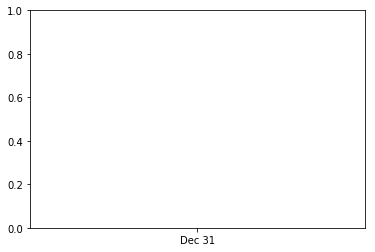

In [12]:
comm_vol_bar_chart_cols = ['total_comm', 'risky_comm', 'neutral_comm', 'supportive_comm', 'unrated_comm']

for username in usernames:
    print(username)
    comm_vol_bar_chart_data = daily_comm_dict[username][comm_vol_bar_chart_cols]
    print(comm_vol_bar_chart_data[comm_vol_bar_chart_data.index >= date_indices[0]])
    comm_vol_bar_chart_data = comm_vol_bar_chart_data[(comm_vol_bar_chart_data.index >= date_indices[0]) & (comm_vol_bar_chart_data.index <= date_indices[-1])]
    generate_report_charts.comm_vol_bar_chart([username], date_indices, comm_vol_bar_chart_data, chart_path, show=True)

    
    

### Contact Rating Distribution

In [ ]:
# users_df.head
# contacts_dict['+vinny']

In [ ]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(usernames),figsize=(10,15), sharex = True, sharey = True)
plt.tight_layout()

for count, e in enumerate(usernames):  
    unrated_threshold = users_df.loc[e, 'unrated_threshold']
    risky_threshold = users_df.loc[e, 'risky_threshold']
    supportive_threshold = users_df.loc[e, 'supportive_threshold']
    
    contacts_df = contacts_dict[e].sort_values('score', ascending = False)
    unrated = contacts_df['score'][contacts_df['score'] < unrated_threshold]
    risky = contacts_df['score'][(contacts_df['score'] >= unrated_threshold)
                                                     & (contacts_df['score'] <= risky_threshold)]
    neutral = contacts_df['score'][(contacts_df['score'] > risky_threshold)
                                                     & (contacts_df['score'] < supportive_threshold)]
    supportive = contacts_df['score'][(contacts_df['score'] >= supportive_threshold)]
    
    axarr[count].bar(supportive.index, supportive, 0.7, color = '#00cc00')
    axarr[count].bar(neutral.index, neutral, 0.7, color = 'b')
    axarr[count].bar(risky.index, risky, 0.7, color = '#ff6600')
    axarr[count].bar(unrated.index, unrated, 0.7, color = '#C0C0C0')
    axarr[count].set_title(e)